In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bc651627-86fd-4c01-88e8-91a0ca99aa2d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
  

{'status': {'timestamp': '2023-07-10T01:46:55.604Z', 'error_code': 0, 'error_message': None, 'elapsed': 50, 'credit_count': 1, 'notice': None, 'total_count': 10248}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10327, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#To visualize the way the data looks

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942518e+07,1.942518e+07,False,NaN,1,NaN,NaN,None,2023-07-10T01:45:00.000Z,30105.758706,8.400183e+09,8.3046,-0.045688,-0.732142,-1.917225,13.855559,9.198355,0.628879,5.848098e+11,49.9457,6.322209e+11,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.368487
1,1027,Ethereum,ETH,ethereum,7099,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202087e+08,1.202087e+08,True,NaN,2,NaN,NaN,None,2023-07-10T01:45:00.000Z,1856.977310,4.636334e+09,5.0794,0.013029,-0.590524,-4.652194,0.963957,1.192060,-3.065727,2.232248e+11,19.0645,2.232248e+11,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.368487
2,825,Tether,USDT,tether,56560,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336072e+10,8.573098e+10,True,NaN,3,NaN,NaN,None,2023-07-10T01:45:00.000Z,1.000159,1.440896e+10,5.1372,-0.031132,-0.009406,0.020421,0.011298,-0.029550,-0.037165,8.337398e+10,7.1206,8.574462e+10,None,2023-07-10T01:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-09 20:47:04.368487
3,1839,BNB,BNB,bnb,1491,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558498e+08,1.558498e+08,False,NaN,4,NaN,NaN,None,2023-07-10T01:45:00.000Z,233.378466,3.041987e+08,-4.0826,0.109113,-1.184330,-5.548097,-9.966047,-25.714453,-27.086442,3.637199e+10,3.1067,3.637199e+10,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.368487
4,3408,USD Coin,USDC,usd-coin,13243,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.749972e+10,2.749972e+10,False,NaN,5,NaN,NaN,None,2023-07-10T01:45:00.000Z,1.000027,1.880839e+09,-1.3245,-0.011340,-0.009162,0.003450,-0.005986,0.032872,0.034316,2.750047e+10,2.3487,2.750047e+10,None,2023-07-10T01:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-09 20:47:04.368487
5,52,XRP,XRP,xrp,978,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.465323,4.000977e+08,-0.6779,-0.260619,-1.223168,-3.465247,-13.149455,8.566703,-9.478489,2.431512e+10,2.0766,4.653230e+10,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.368487
6,2010,Cardano,ADA,cardano,857,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.496618e+10,3.596797e+10,False,NaN,7,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.281239,1.982265e+08,-5.8212,0.124508,-3.103377,-3.601419,-2.506680,-23.530461,-29.316931,9.833862e+09,0.8399,1.265576e+10,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.368487
7,74,Dogecoin,DOGE,dogecoin,739,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.401083e+11,1.401083e+11,True,NaN,8,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.064683,1.794445e+08,17.9450,0.306800,-1.940794,-4.811422,-7.480680,-11.223453,-23.530923,9.062576e+09,0.7741,9.062576e+09,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.368487
8,5426,Solana,SOL,solana,483,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.02

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
  
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    #Needed to chage this line because the append was no longer working, I used the function concat()
    #df = pd.concat([df, df2], ignore_index=True)
    df
    
    if not os.path.isfile(r'C:\Users\user\Documents\API.csv'):
        df.to_csv(r'C:\Users\user\Documents\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\user\Documents\API.csv', mode='a', header=False)

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #Sleep for 1 minute, it will run every minute
exit()

API Runner completed


KeyboardInterrupt: 

In [7]:
df72 = pd.read_csv(r'C:\Users\user\Documents\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.942371e+07,1.942371e+07,False,NaN,1,NaN,NaN,NaN,2023-07-08T15:25:00.000Z,30214.465242,8.205461e+09,-47.4910,-0.021500,-0.503174,-1.194734,13.570387,9.861638,8.361349,5.868771e+11,49.8902,6.345038e+11,NaN,2023-07-08T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-07 22:26:33.559103
1,1,1027,Ethereum,ETH,ethereum,7098,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202092e+08,1.202092e+08,True,NaN,2,NaN,NaN,NaN,2023-07-08T15:25:00.000Z,1860.939168,4.468088e+09,-39.6975,-0.019441,-0.619354,-3.161129,0.313260,0.997016,1.451393,2.237019e+11,19.0192,2.237019e+11,NaN,2023-07-08T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-07 22:26:33.559103
2,2,825,Tether,USDT,tether,56538,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.336072e+10,8.573098e+10,True,NaN,3,NaN,NaN,NaN,2023-07-08T15:25:00.000Z,1.000169,1.417556e+10,-40.8853,-0.002307,-0.001474,0.002951,-0.014695,-0.030508,-0.027880,8.337484e+10,7.0886,8.574550e+10,NaN,2023-07-08T15:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-07 22:26:33.559103
3,3,1839,BNB,BNB,bnb,1489,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558500e+08,1.558500e+08,False,NaN,4,NaN,NaN,NaN,2023-07-08T15:25:00.000Z,236.270046,3.333196e+08,-31.4883,-0.021332,0.285377,-4.599639,-10.778618,-24.548518,-23.946424,3.682269e+10,3.1302,3.682269e+10,NaN,2023-07-08T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-07 22:26:33.559103
4,4,3408,USD Coin,USDC,usd-coin,13236,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.750474e+10,2.750474e+10,False,NaN,5,NaN,NaN,NaN,2023-07-08T15:25:00.000Z,1.000017,2.099194e+09,-42.3836,-0.010267,-0.015033,-0.016073,-0.008615,0.006197,0.026335,2.750522e+10,2.3385,2.750522e+10,NaN,2023-07-08T15:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-07 22:26:33.559103
5,5,52,XRP,XRP,xrp,978,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,NaN,2023-07-08T15:25:00.000Z,0.467826,4.056875e+08,-47.4707,-0.014722,0.244181,-1.127924,-10.639308,10.312133,-6.692459,2.444593e+10,2.0782,4.678263e+10,NaN,2023-07-08T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-07 22:26:33.559103
6,6,2010,Cardano,ADA,cardano,857,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.496270e+10,3.595238e+10,False,NaN,7,NaN,NaN,NaN,2023-07-08T15:25:00.000Z,0.289008,1.955633e+08,-18.1770,0.638634,1.799943,-0.418379,-12.067878,-20.371478,-25.493255,1.010450e+10,0.8591,1.300536e+10,NaN,2023-07-08T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-07 22:26:33.559103
7,7,74,Dogecoin,DOGE,dogecoin,739,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.400889e+11,1.400889e+11,True,NaN,8,NaN,NaN,NaN,2023-07-08T15:25:00.000Z,0.065309,1.503300e+08,-29.9984,-0.184695,-0.168601,-3.767289,-4.075204,-10.264197,-21.659437,9.149035e+09,0.7779,9.149035e+09,NaN,2023-07-08T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-07 22:26:33.559103
8,8,5426,Solana,SOL,solana,483,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-eco

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942518e+07,1.942518e+07,False,NaN,1,NaN,NaN,None,2023-07-10T01:45:00.000Z,30105.758706,8.400183e+09,8.3046,-0.045688,-0.732142,-1.917225,13.855559,9.198355,0.628879,5.848098e+11,49.9457,6.322209e+11,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
1,1027,Ethereum,ETH,ethereum,7099,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202087e+08,1.202087e+08,True,NaN,2,NaN,NaN,None,2023-07-10T01:45:00.000Z,1856.977310,4.636334e+09,5.0794,0.013029,-0.590524,-4.652194,0.963957,1.192060,-3.065727,2.232248e+11,19.0645,2.232248e+11,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
2,825,Tether,USDT,tether,56560,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336072e+10,8.573098e+10,True,NaN,3,NaN,NaN,None,2023-07-10T01:45:00.000Z,1.000159,1.440896e+10,5.1372,-0.031132,-0.009406,0.020421,0.011298,-0.029550,-0.037165,8.337398e+10,7.1206,8.574462e+10,None,2023-07-10T01:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-09 20:47:04.878486
3,1839,BNB,BNB,bnb,1491,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558498e+08,1.558498e+08,False,NaN,4,NaN,NaN,None,2023-07-10T01:45:00.000Z,233.378466,3.041987e+08,-4.0826,0.109113,-1.184330,-5.548097,-9.966047,-25.714453,-27.086442,3.637199e+10,3.1067,3.637199e+10,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
4,3408,USD Coin,USDC,usd-coin,13243,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.749972e+10,2.749972e+10,False,NaN,5,NaN,NaN,None,2023-07-10T01:45:00.000Z,1.000027,1.880839e+09,-1.3245,-0.011340,-0.009162,0.003450,-0.005986,0.032872,0.034316,2.750047e+10,2.3487,2.750047e+10,None,2023-07-10T01:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-09 20:47:04.878486
5,52,XRP,XRP,xrp,978,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.465323,4.000977e+08,-0.6779,-0.260619,-1.223168,-3.465247,-13.149455,8.566703,-9.478489,2.431512e+10,2.0766,4.653230e+10,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
6,2010,Cardano,ADA,cardano,857,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.496618e+10,3.596797e+10,False,NaN,7,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.281239,1.982265e+08,-5.8212,0.124508,-3.103377,-3.601419,-2.506680,-23.530461,-29.316931,9.833862e+09,0.8399,1.265576e+10,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
7,74,Dogecoin,DOGE,dogecoin,739,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.401083e+11,1.401083e+11,True,NaN,8,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.064683,1.794445e+08,17.9450,0.306800,-1.940794,-4.811422,-7.480680,-11.223453,-23.530923,9.062576e+09,0.7741,9.062576e+09,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
8,5426,Solana,SOL,solana,483,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.02

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19425181.00000,19425181.00000,False,NaN,1,NaN,NaN,None,2023-07-10T01:45:00.000Z,30105.75871,8400182757.56763,8.30460,-0.04569,-0.73214,-1.91723,13.85556,9.19836,0.62888,584809812003.65735,49.94570,632220932823.06006,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
1,1027,Ethereum,ETH,ethereum,7099,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120208689.74529,120208689.74529,True,NaN,2,NaN,NaN,None,2023-07-10T01:45:00.000Z,1856.97731,4636334409.53377,5.07940,0.01303,-0.59052,-4.65219,0.96396,1.19206,-3.06573,223224809356.14661,19.06450,223224809356.14999,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
2,825,Tether,USDT,tether,56560,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83360717904.11366,85730981418.02776,True,NaN,3,NaN,NaN,None,2023-07-10T01:45:00.000Z,1.00016,14408961492.82014,5.13720,-0.03113,-0.00941,0.02042,0.01130,-0.02955,-0.03717,83373979506.18190,7.12060,85744620098.08000,None,2023-07-10T01:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-09 20:47:04.878486
3,1839,BNB,BNB,bnb,1491,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155849825.75249,155849825.75249,False,NaN,4,NaN,NaN,None,2023-07-10T01:45:00.000Z,233.37847,304198671.78854,-4.08260,0.10911,-1.18433,-5.54810,-9.96605,-25.71445,-27.08644,36371993265.88770,3.10670,36371993265.89000,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
4,3408,USD Coin,USDC,usd-coin,13243,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27499719240.65911,27499719240.65911,False,NaN,5,NaN,NaN,None,2023-07-10T01:45:00.000Z,1.00003,1880838867.41417,-1.32450,-0.01134,-0.00916,0.00345,-0.00599,0.03287,0.03432,27500474815.39294,2.34870,27500474815.39000,None,2023-07-10T01:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-09 20:47:04.878486
5,52,XRP,XRP,xrp,978,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52254289650.00000,99988655562.00000,False,NaN,6,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.46532,400097705.44200,-0.67790,-0.26062,-1.22317,-3.46525,-13.14946,8.56670,-9.47849,24315122681.70163,2.07660,46532299729.96000,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
6,2010,Cardano,ADA,cardano,857,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34966184260.19600,35967965707.14300,False,NaN,7,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.28124,198226451.48466,-5.82120,0.12451,-3.10338,-3.60142,-2.50668,-23.53046,-29.31693,9833862385.13254,0.83990,12655764896.68000,None,2023-07-10T01:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-09 20:47:04.878486
7,74,Dogecoin,DOGE,dogecoin,739,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140108276383.70523,140108276383.70523,True,NaN,8,NaN,NaN,None,2023-07-10T01:45:00.000Z,0.06468,179444528.15745,17.94500,0.30680,-1.94079,-4.81142,-7.48068,-11.22345,-23.53092,9062576093.81712,0.77410,9062576093.82000,None,2023-07-10T01:45:00.000Z,Na

In [16]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04569,-0.73214,-1.91723,13.85556,9.19836,0.62888
Ethereum,0.01303,-0.59052,-4.65219,0.96396,1.19206,-3.06573
Tether,-0.03113,-0.00941,0.02042,0.01130,-0.02955,-0.03717
BNB,0.10911,-1.18433,-5.54810,-9.96605,-25.71445,-27.08644
USD Coin,-0.01134,-0.00916,0.00345,-0.00599,0.03287,0.03432
XRP,-0.26062,-1.22317,-3.46525,-13.14946,8.56670,-9.47849
Cardano,0.12451,-3.10338,-3.60142,-2.50668,-23.53046,-29.31693
Dogecoin,0.30680,-1.94079,-4.81142,-7.48068,-11.22345,-23.53092
Solana,0.04490,-4.57401,8.47336,23.85023,1.65610,0.75277


In [17]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.04569
              quote.USD.percent_change_24h    -0.73214
              quote.USD.percent_change_7d     -1.91723
              quote.USD.percent_change_30d    13.85556
              quote.USD.percent_change_60d     9.19836
              quote.USD.percent_change_90d     0.62888
Ethereum      quote.USD.percent_change_1h      0.01303
              quote.USD.percent_change_24h    -0.59052
              quote.USD.percent_change_7d     -4.65219
              quote.USD.percent_change_30d     0.96396
              quote.USD.percent_change_60d     1.19206
              quote.USD.percent_change_90d    -3.06573
Tether        quote.USD.percent_change_1h     -0.03113
              quote.USD.percent_change_24h    -0.00941
              quote.USD.percent_change_7d      0.02042
              quote.USD.percent_change_30d     0.01130
              quote.USD.percent_change_60d    -0.02955
              quote.US

In [18]:
type(df3) #Here it was a dataframe

pandas.core.frame.DataFrame

In [19]:
type(df4) #Here has turned into a series

pandas.core.series.Series

In [20]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.04569
             quote.USD.percent_change_24h  -0.73214
             quote.USD.percent_change_7d   -1.91723
             quote.USD.percent_change_30d  13.85556
             quote.USD.percent_change_60d   9.19836
             quote.USD.percent_change_90d   0.62888
Ethereum     quote.USD.percent_change_1h    0.01303
             quote.USD.percent_change_24h  -0.59052
             quote.USD.percent_change_7d   -4.65219
             quote.USD.percent_change_30d   0.96396
             quote.USD.percent_change_60d   1.19206
             quote.USD.percent_change_90d  -3.06573
Tether       quote.USD.percent_change_1h   -0.03113
             quote.USD.percent_change_24h  -0.00941
             quote.USD.percent_change_7d    0.02042
             quote.USD.percent_change_30d   0.01130
             quote.USD.percent_change_60d  -0.02955
             quote.USD.percent_change_90d  -0.03717
BNB          quote.USD.percent_change_1h    0.10911
             quote.USD.percent_change_24h  -1.18433
             quote.USD.percent_change_7d   -5.54810
             quote.USD.percent_change_30d  -9.96605
             quote.USD.percent_change_60d -25.71445
             quote.USD.percent_change_90d -27.08644
USD Coin     quote.USD.percent_change_1h   -0.01134
             quote.USD.percent_change_24h  -0.00916
             quote.USD.percent_change_7d    0.00345
             quote.USD.percent_change_30d  -0.00599
             quote.USD.percent_change_60d   0.03287
             quote.USD.percent_change_90d   0.03432
XRP          quote.USD.percent_change_1h   -0.26062
             quote.USD.percent_change_24h  -1.22317
             quote.USD.percent_change_7d   -3.46525
             quote.USD.percent_change_30d -13.14946
             quote.USD.percent_change_60d   8.56670
             quote.USD.percent_change_90d  -9.47849
Cardano      quote.USD.percent_change_1h    0.12451
             quote.USD.percent_change_24h  -3.10338
             quote.USD.percent_change_7d   -3.60142
             quote.USD.percent_change_30d  -2.50668
             quote.USD.percent_change_60d -23.53046
             quote.USD.percent_change_90d -29.31693
Dogecoin     quote.USD.percent_change_1h    0.30680
             quote.USD.percent_change_24h  -1.94079
             quote.USD.percent_change_7d   -4.81142
             quote.USD.percent_change_30d  -7.48068
             quote.USD.percent_change_60d -11.22345
             quote.USD.percent_change_90d -23.53092
Solana       quote.USD.percent_change_1h    0.04490
             quote.USD.percent_change_24h  -4.57401
             quote.USD.percent_change_7d    8.47336
             quote.USD.percent_change_30d  23.85023
             quote.USD.percent_change_60d   1.65610
             quote.USD.percent_change_90d   0.75277
TRON         quote.USD.percent_change_1h   -0.00464
             quote.USD.percent_change_24h  -4.15088
             quote.USD.percent_change_7d    0.96296
             quote.USD.percent_change_30d   8.36964
             quote.USD.percent_change_60d  10.89365
             quote.USD.percent_change_90d  14.39816
Litecoin     quote.USD.percent_change_1h    0.38338
             quote.USD.percent_change_24h  -4.41396
             quote.USD.percent_change_7d  -17.76757
             quote.USD.percent_change_30d   5.77814
             quote.USD.percent_change_60d  16.22334
             quote.USD.percent_change_90d   0.12242
Polygon      quote.USD.percent_change_1h    0.11142
             quote.USD.percent_change_24h  -0.79574
             quote.USD.percent_change_7d   -0.45249
             quote.USD.percent_change_30d  -3.83520
             quote.USD.percent_change_60d -21.94681
             quote.USD.percent_change_90d -39.17352
Polkadot     quote.USD.percent_change_1h    0.24811
             quote.USD.percent_change_24h  -2.09818
             quote.USD.percent_change_7d   -9.03193
             quote.USD.percent_change_30d

In [22]:
type(df5) #Now it is a dataframe

pandas.core.frame.DataFrame

In [24]:
df5.count()

values    90
dtype: int64

In [28]:
#We'll create an index
#I used a different function since index was no longer available
index = pd.RangeIndex(start=0, stop=90)

#Trying to set an index for the df
#f6 = df5.set_index(df5['name'])
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04569
1,Bitcoin,quote.USD.percent_change_24h,-0.73214
2,Bitcoin,quote.USD.percent_change_7d,-1.91723
3,Bitcoin,quote.USD.percent_change_30d,13.85556
4,Bitcoin,quote.USD.percent_change_60d,9.19836
5,Bitcoin,quote.USD.percent_change_90d,0.62888
6,Ethereum,quote.USD.percent_change_1h,0.01303
7,Ethereum,quote.USD.percent_change_24h,-0.59052
8,Ethereum,quote.USD.percent_change_7d,-4.65219
9,Ethereum,quote.USD.percent_change_30d,0.96396


In [36]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04569
1,Bitcoin,quote.USD.percent_change_24h,-0.73214
2,Bitcoin,quote.USD.percent_change_7d,-1.91723
3,Bitcoin,quote.USD.percent_change_30d,13.85556
4,Bitcoin,quote.USD.percent_change_60d,9.19836
5,Bitcoin,quote.USD.percent_change_90d,0.62888
6,Ethereum,quote.USD.percent_change_1h,0.01303
7,Ethereum,quote.USD.percent_change_24h,-0.59052
8,Ethereum,quote.USD.percent_change_7d,-4.65219
9,Ethereum,quote.USD.percent_change_30d,0.96396


In [39]:
#df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.04569
1,Bitcoin,24h,-0.73214
2,Bitcoin,7d,-1.91723
3,Bitcoin,30d,13.85556
4,Bitcoin,60d,9.19836
5,Bitcoin,90d,0.62888
6,Ethereum,1h,0.01303
7,Ethereum,24h,-0.59052
8,Ethereum,7d,-4.65219
9,Ethereum,30d,0.96396


# Visualizing Data

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

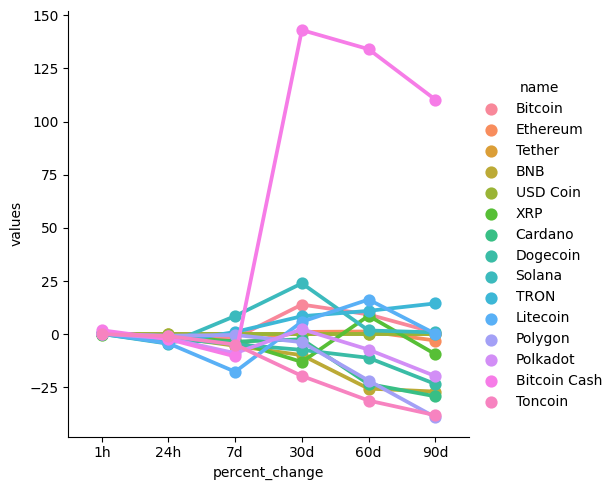

In [40]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [65]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,30105.75871,2023-07-09 20:47:04.878486


<Axes: xlabel='percent_change', ylabel='values'>

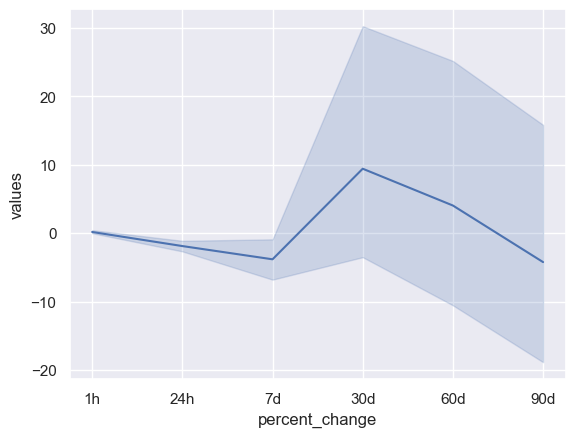

In [70]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='percent_change', y='values', data = df7)

In [68]:
#Checking columns
df7.columns

Index(['name', 'percent_change', 'values'], dtype='object')